# Benchmark Analysis

### Select a completed run file

In [2]:
import os
from os.path import join
from ipywidgets import widgets, HBox
from IPython.display import display
import notebook_test_case  # for fixing the PATH variable

out_folder = "./out/"
test_cases = [f for f in os.listdir(out_folder) if os.path.isfile(join(out_folder, f))]
test_cases = [tc for tc in test_cases if "composite" in tc]

if len(test_cases) == 0:
  print("no test cases found.")

composite_test_case_dropdown = widgets.Dropdown(
  description="test case:",
  options=test_cases,
  disabled=len(test_cases) == 0,
  style={"description_width": "initial"},
)

mode_dropdown = widgets.Dropdown(
  description="mode:",
  options=["dois", "datasets", "strategies" "parameters"],
  style={"description_width": "40px"},
)

column_dropdown = widgets.Dropdown(
  description="columns:",
  options=["context_strategy", "update_strategy", "storage_strategy"],
  style={"description_width": "60px"},
)
row_dropdown = widgets.Dropdown(
  description="rows",
  options=["update_strategy", "context_strategy", "storage_strategy"],
  style={"description_width": "30px"},
)

HBox([composite_test_case_dropdown, mode_dropdown, column_dropdown, row_dropdown])

### DOI histogram ground truth

<AxesSubplot:xlabel='doi', ylabel='Count'>

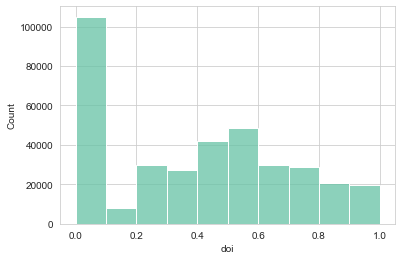

In [2]:
import pandas as pd
from notebook_test_case import *
from analysis import collect_ground_truth_dfs
from plots import histogram

ground_truth_df = collect_ground_truth_dfs(
  composite_test_case_dropdown.value,
  mode_dropdown.value
)

histogram(ground_truth_df, "doi")

### Sample of the dataset under analysis

In [4]:
import pandas as pd
import json
from notebook_test_case import *
from analysis import collect_ground_truth_dfs

ground_truth_df = collect_ground_truth_dfs(
  composite_test_case_dropdown.value, "datasets"
)

datasets = ground_truth_df["datasets"].unique().tolist()

presets = json.load(open("presets.json"))["datasets"]
for data_label in datasets:
  path: str = presets[data_label]["data_path"]
  if not path.endswith(".csv"):
    print("not a CSV file, trying to load next...")
    continue
  df = pd.read_csv(path)
  print(df)

print("done loading")

not a CSV file, trying to load next...
done loading


## Analyze DOI error

### DOI distribution for all strategies compared to bigger chunks

Text(0.5, 0.98, 'DOI distribution strategies vs. bigger chunks')

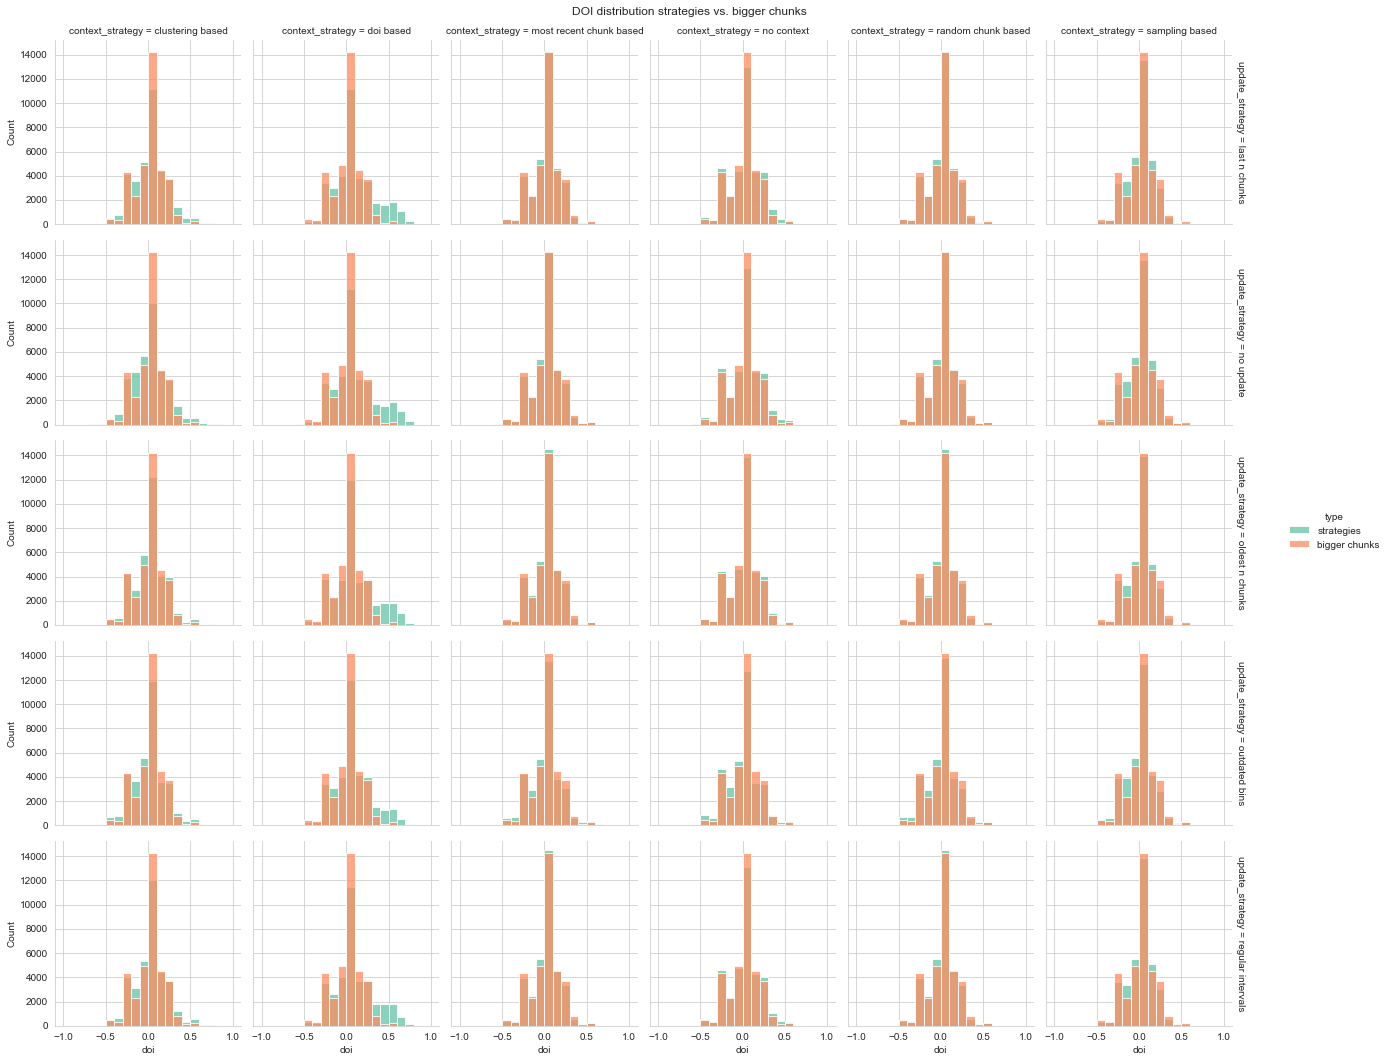

In [3]:
from test_case import get_full_title
from analysis import get_error_for_test_case, merge_err_dfs
from plots import histogram_matrix

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_error, all_bc_errors, _ = get_error_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)
df = merge_err_dfs(all_strategies_error, all_bc_errors, mode=mode)

column = column_dropdown.value
row = row_dropdown.value

hm = histogram_matrix(df=df, row=row, x="doi", column=column, hue="type")
hm.fig.suptitle("DOI distribution strategies vs. bigger chunks")

### DOI distributions for all combinations compared to using no strategies

Text(0.5, 0.98, 'DOI distribution strategies vs. no strategies')

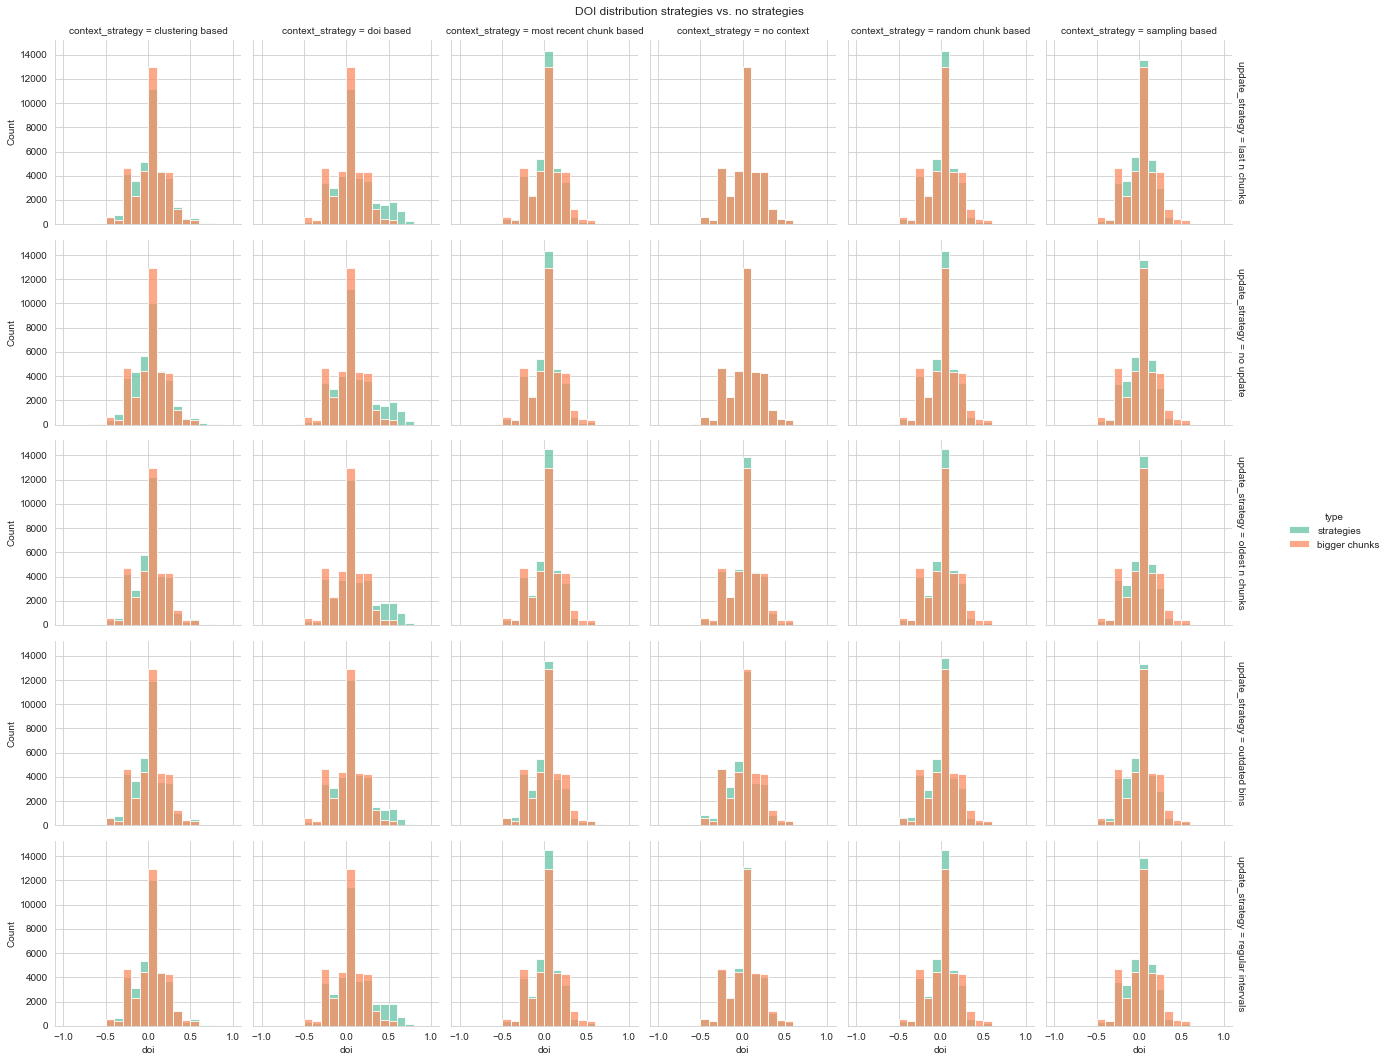

In [4]:
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from analysis import get_error_for_test_case, merge_err_dfs
from plots import histogram_matrix

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_error, _, all_sc_errors = get_error_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)
df = merge_err_dfs(all_strategies_error, all_sc_errors, mode=mode)

column = column_dropdown.value
row = row_dropdown.value

hm = histogram_matrix(df=df, row=row, x="doi", column=column, hue="type")
hm.fig.suptitle("DOI distribution strategies vs. no strategies")

### Error for all combinations in a grid

Text(0.5, 0.98, 'DOI error strategies vs. bigger chunks vs. no strategies')

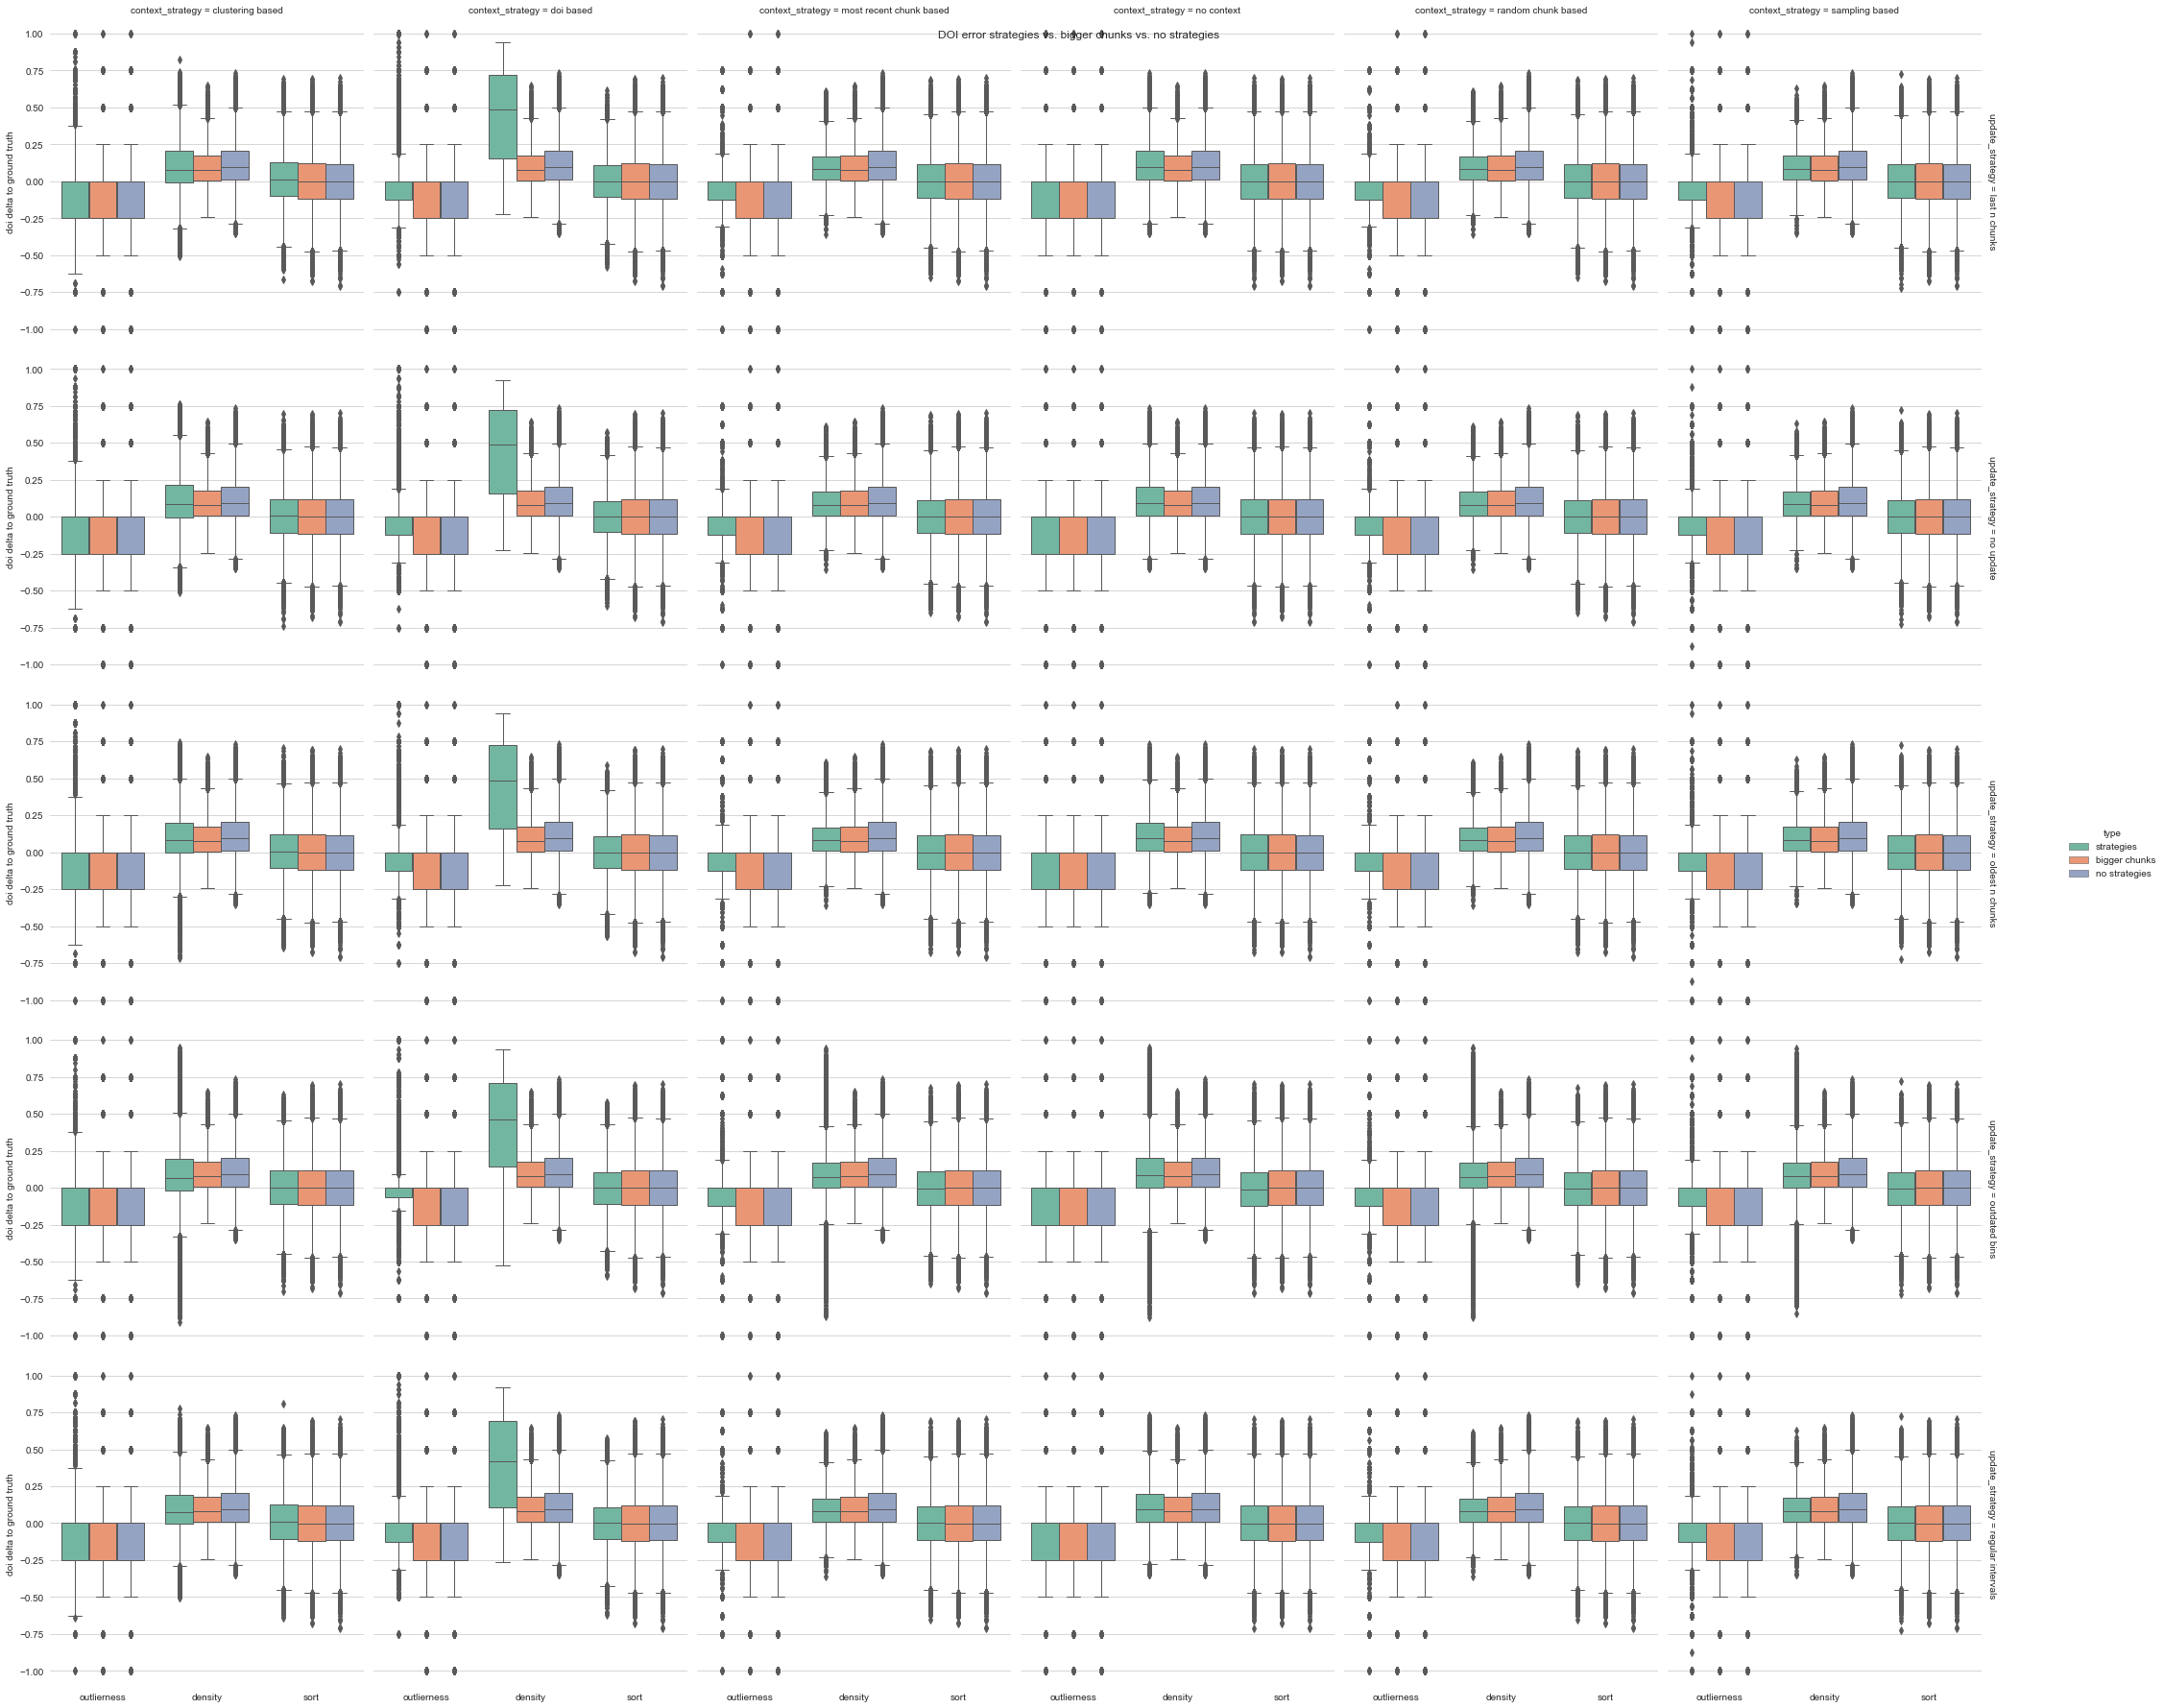

In [3]:
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from analysis import get_error_for_test_case, merge_err_dfs
from plots import boxplot_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import KBinsDiscretizer

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_error, all_bigger_chunks_error, all_sc_errors = get_error_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)
df = merge_err_dfs(all_strategies_error, all_bigger_chunks_error, mode, all_sc_errors)


rus = RandomUnderSampler()
# est = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")
# y = est.fit_transform(df["doi"].to_numpy().reshape(-1, 1))
# y = df["doi"] == 0
# df, y_res = rus.fit_resample(df, y)

column = column_dropdown.value
row = row_dropdown.value

m = boxplot_matrix(df, x=mode, y="doi", row=row, column=column, hue="type")
m.set_axis_labels("", "doi delta to ground truth")
m.fig.suptitle("DOI error strategies vs. bigger chunks vs. no strategies")

In [31]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(100, 5))
df["label"] = np.round(df[0] * df[1] * 100) % 5
df["label"].unique()

array([2., 4., 3., 1., 0.])

### ... using absolute error

Text(0.5, 0.98, 'DOI error strategies vs. bigger chunks vs. no strategies')

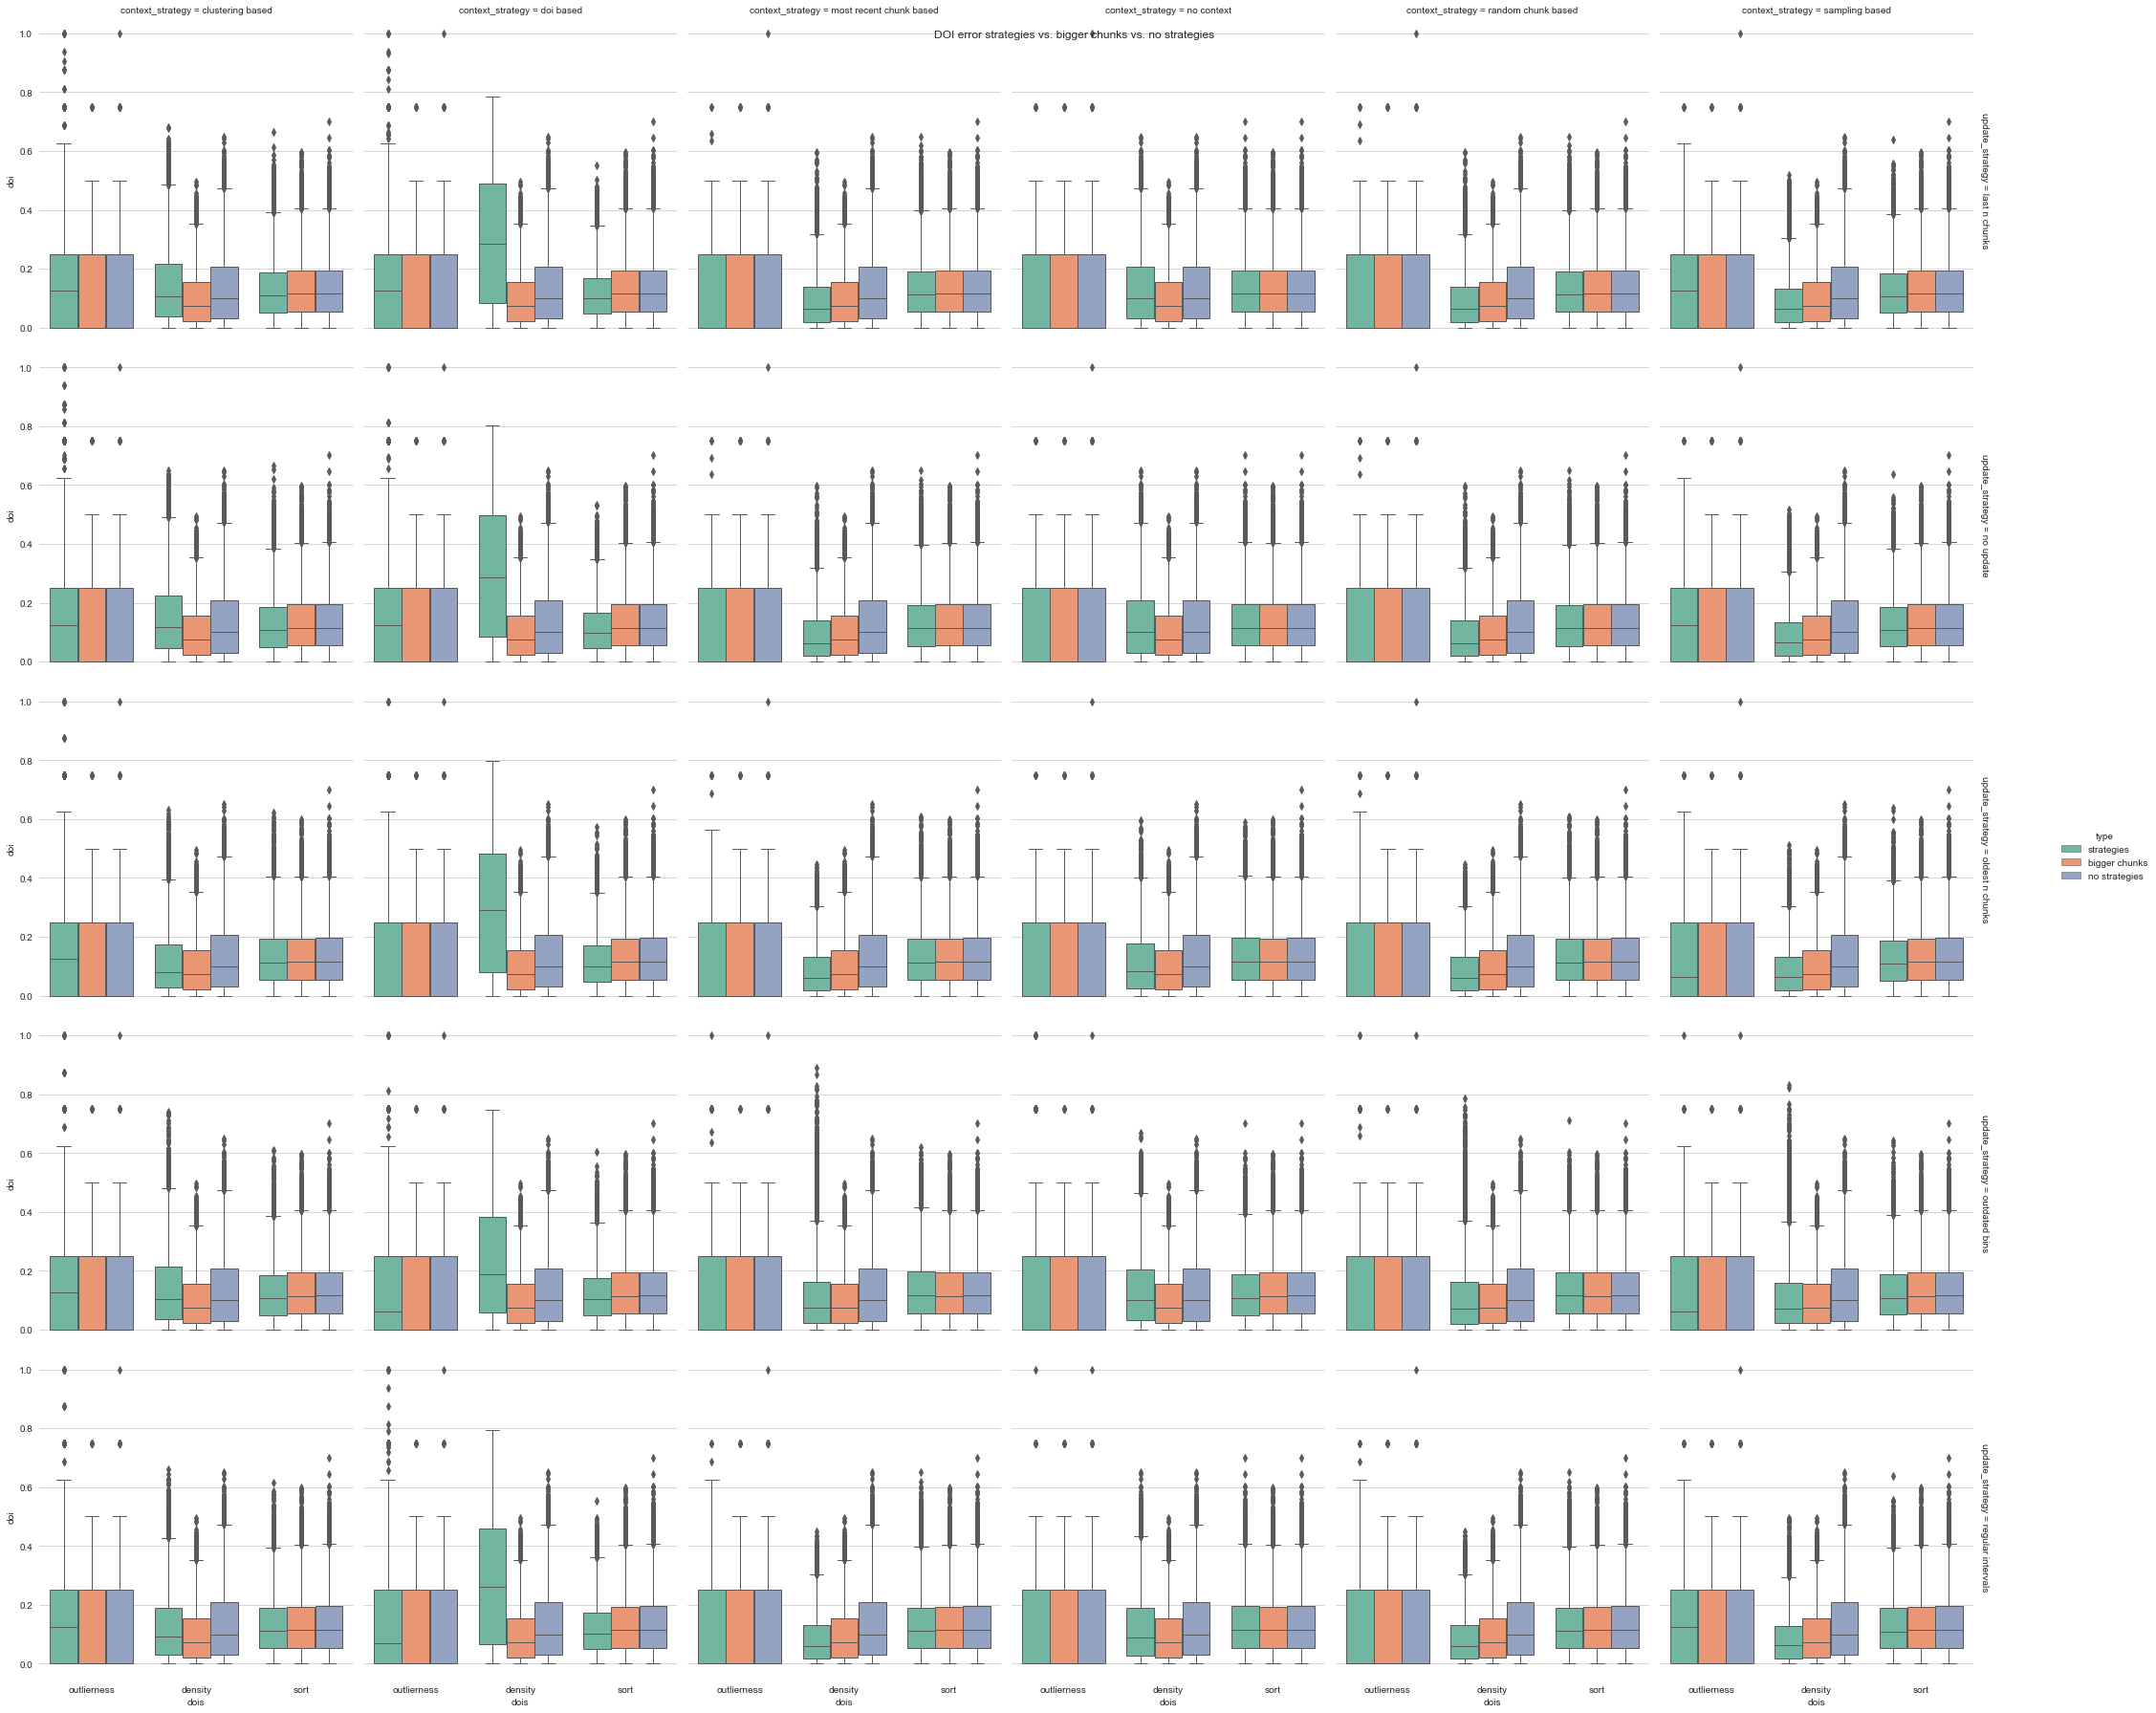

In [7]:
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from analysis import get_error_for_test_case, merge_err_dfs
from plots import boxplot_matrix

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_error, all_bigger_chunks_error, all_sc_errors = get_error_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)
df = merge_err_dfs(all_strategies_error, all_bigger_chunks_error, mode, all_sc_errors)

df["doi"] = df["doi"].abs()

column = column_dropdown.value
row = row_dropdown.value

m = boxplot_matrix(df, x=mode, y="doi", row=row, column=column, hue="type")
m.fig.suptitle("DOI error strategies vs. bigger chunks vs. no strategies")

### Error aggregated across strategies

(<seaborn.axisgrid.FacetGrid at 0x19a8a9dcd90>,
 <seaborn.axisgrid.FacetGrid at 0x19a81a561c0>)

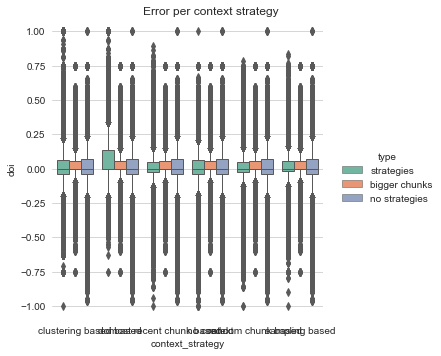

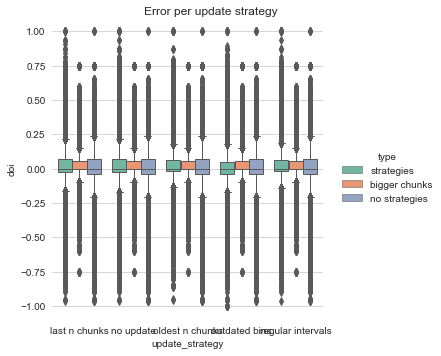

In [8]:
import seaborn as sns
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from analysis import get_error_for_test_case, merge_err_dfs
from plots import boxplot

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_error, all_bigger_chunks_error, all_sc_error = get_error_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)
df = merge_err_dfs(all_strategies_error, all_bigger_chunks_error, sc_err_df=all_sc_error, mode=mode)

column = column_dropdown.value
row = row_dropdown.value

context_plot = boxplot(df=df, x="context_strategy", y="doi", hue="type")
context_plot.fig.suptitle("Error per context strategy")
update_plot = boxplot(df=df, x="update_strategy", y="doi", hue="type")
update_plot.fig.suptitle("Error per update strategy")
context_plot, update_plot

### Error aggregated across 'mode'

Text(0.5, 0.98, 'Error across dois')

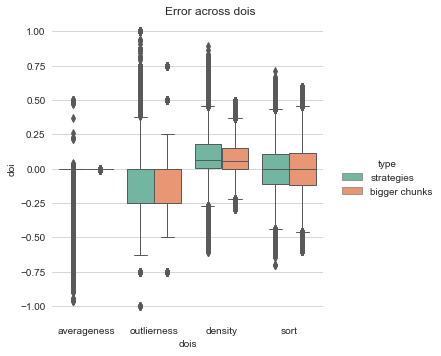

In [9]:
import seaborn as sns
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from analysis import get_error_for_test_case, merge_err_dfs
from plots import boxplot

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_error, all_bigger_chunks_error, _ = get_error_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)
df = merge_err_dfs(all_strategies_error, all_bigger_chunks_error, mode=mode)

column = column_dropdown.value
row = row_dropdown.value

boxplot(df=df, x=mode, y="doi", hue="type").fig.suptitle(f"Error across {mode}")

## Analyze Runtime

### Runtime strategies vs. bigger chunks vs. no strategies

In [10]:
from doi_component.averageness_component import *
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(10000000, 5))


avg = AveragenessComponent(subspace=[0, 1, 2, 3, 4])

array([0.3345581 , 0.56592194, 0.46779782, ..., 0.58493318, 0.66014241,
       0.64049021])

<AxesSubplot:xlabel='step', ylabel='step_time'>

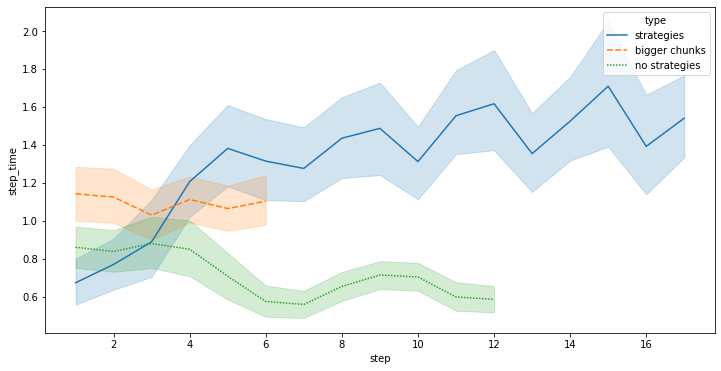

In [7]:
import seaborn as sns
import notebook_test_case  # for fixing the PATH variable
import matplotlib.pyplot as plt
from test_case import get_full_title
from analysis import get_times_for_test_case, merge_time_dfs

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_times, all_bigger_chunks_times, all_no_strategies_times = get_times_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)

df = merge_time_dfs(all_strategies_times, all_bigger_chunks_times, all_no_strategies_times, mode)
df.loc[df["type"] == "bigger chunks", "step"] += 1

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="step", y="step_time", hue="type", style="type", )

### Runtime per component 

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from analysis import get_times_for_test_case, merge_time_dfs

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
df, _, _ = get_times_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, sharex=True)
fig.set_figwidth(16)
fig.set_figheight(5)

df.drop(columns=["context_strategy", "update_strategy", "storage_strategy"], inplace=True)
df = df.melt(["step"])
sns.lineplot(
  data=df[df["step"] % 5 == 0], x="step", y="value", hue="variable", style="variable", ax=ax1
)
sns.lineplot(
  data=df[df["step"] % 5 != 0], x="step", y="value", hue="variable", style="variable", ax=ax2
)

### Runtime per test case vs. bigger chunks

In [ ]:
import seaborn as sns
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from analysis import get_times_for_test_case, merge_time_dfs

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_times, all_bigger_chunks_times, all_no_strategies_times = get_times_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)

df = merge_time_dfs(all_strategies_times, all_bigger_chunks_times, all_no_strategies_times, mode)

sns.relplot(
  data=df, 
  x="step", 
  y="step_time", 
  hue="type", 
  style="type",
  col="context_strategy", 
  row="update_strategy", 
  kind="line",
).set_titles("cont:{col_name} --- upd:{row_name}")

### Summarized Runtime per strategy vs. bigger chunks vs. no strategies

In [ ]:
import seaborn as sns
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from plots import boxplot_matrix
from analysis import get_times_for_test_case, merge_time_dfs

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_times, all_bigger_chunks_times, all_no_strategies_times = get_times_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)

df = merge_time_dfs(all_strategies_times, all_bigger_chunks_times, all_no_strategies_times, mode)

m = boxplot_matrix(df, x=mode, y="step_time", row=row_dropdown.value, column=column_dropdown.value, hue="type")
m.fig.suptitle("DOI error strategies vs. bigger chunks vs. no strategies")

### Runtime per 'mode'

In [ ]:
import seaborn as sns
import notebook_test_case  # for fixing the PATH variable
from test_case import get_full_title
from analysis import get_times_for_test_case, merge_time_dfs

if composite_test_case_dropdown.value is None or mode_dropdown.value is None:
  raise Exception("select a test case and mode with the widget above")

mode = mode_dropdown.value
all_strategies_times, all_bigger_chunks_times, all_no_strategies_times = get_times_for_test_case(
  test_case_file_name=composite_test_case_dropdown.value, 
  mode=mode
)
df = merge_time_dfs(all_strategies_times, all_bigger_chunks_times, all_no_strategies_times, mode)
sns.relplot(
  data=df, 
  x="step", 
  y="step_time", 
  hue="type", 
  style="type",
  col=mode, 
  kind="line",
).set_titles("{col_name}")